# <font color='DarkGreen'>Rafael Cavaletti Maia</font>
# <font color='DarkGreen'>Big Data Real-Time Analytics com Python e Spark - Data Science Academy</font>

## <font color='DarkGreen'>Projeto com Feedback 03 - Prevendo Nível de Satisfação dos Clientes do Santander</font>

www.datascienceacademy.com.br

## Parte 1 - Análise Exploratória e Limpeza dos Dados
## <font color='DarkBlue'>Parte 2 - Feature Engineering</font>
## Parte 3 - Machine Learning

## Versões utilizadas

In [1]:
# Versão da linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


## Pacotes utilizados

In [2]:
# Imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versão dos pacotes
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Rafael Cavaletti Maia" --iversions

Author: Rafael Cavaletti Maia

imblearn  : 0.0
numpy     : 1.21.5
matplotlib: 3.5.1
pandas    : 1.4.2
sklearn   : 1.1.3
seaborn   : 0.11.2



## Carregando os dados
Os dados carregados foram salvos no formato pickle após a análise exploratória e limpeza realizado na etapa 1 do projeto.

In [4]:
# Carregando
df_treino = pd.read_pickle('pickle_files/df_treino_sem_outliers.pkl')
df_teste= pd.read_pickle('pickle_files/df_teste.pkl')

In [5]:
# Visualizando o dataset de treino
df_treino.head()

,index,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,10.576564,0
1,1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,10.805234,0
2,2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,11.117417,0
3,3,8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,11.066763,0
4,5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,11.384816,0


In [6]:
# Visualizando o dataset de teste
df_teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,...,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [7]:
# Removendo a coluna index do dataset de treino
df_treino = df_treino.drop('index', axis = 1)

In [8]:
# Visualizando o shape
print(f'Shape do dataset de treino: {df_treino.shape} \nShape do dataset de teste: {df_teste.shape}')

Shape do dataset de treino: (67791, 143) 
Shape do dataset de teste: (75818, 142)


## Definindo funções
<br>
Funções utilizadas para realizar a engenharia de atributos.

In [9]:
def encontrar_alta_corr(df, threshold):
    """
    Aplica a distribuição logarítmica incluindo os valores 
    0 para uma determinada variável
    Parâmetros:
    var: variável a ser preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("Máxima correlação:",corr.max(), ", Mínima correlação: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [10]:
def listar_alta_corr(df, threshold):
    """
    Aplica a distribuição logarítmica incluindo os valores 
    0 para uma determinada variável
    Parâmetros:
    var: variável a ser preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    correlatas = set()
    matriz_corr = df.corr()
    for i in range(len(matriz_corr.columns)):
        for j in range(i):
            if abs(matriz_corr.iloc[i,j]) > threshold:
                coluna = matriz_corr.columns[i]
                correlatas.add(coluna)
    
    return(correlatas)

In [11]:
def outliers_z_score(df):
    """
    Aplica a distribuição logarítmica incluindo os valores 
    0 para uma determinada variável
    Parâmetros:
    var: variável a ser preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    desvios = 3

    media = np.mean(df)
    desvio_padrao = np.std(df)
    z_scores = [(y - media) / desvio_padrao for y in df]
    return np.where(np.abs(z_scores) > desvios)

In [12]:
def aplicar_log_com_zero(variables, df1, df2):
    """
    Aplica distribuição logaritmica em uma variável
    incluindo os valores 0
    Parâmetros:
    variables: variáveis a serem preenchida
    df1: o dataframe de treino
    df2: o dataframe de teste
    """
    df_var_log_treino_0 = df1.copy()
    df_var_log_teste_0 = df2.copy()
    
    for var in variables:
        df_var_log_treino_0.loc[df_var_log_treino_0[var]>0,var] = np.log(df_var_log_treino_0.loc[df_var_log_treino_0[var]>0, var])


        df_var_log_teste_0.loc[df_var_log_teste_0[var]>0, var] = np.log(df_var_log_teste_0.loc[df_var_log_teste_0[var]>0, var])
    
    return(df_var_log_treino_0, df_var_log_teste_0)

## Feature Selection

### Correlação

<AxesSubplot:>

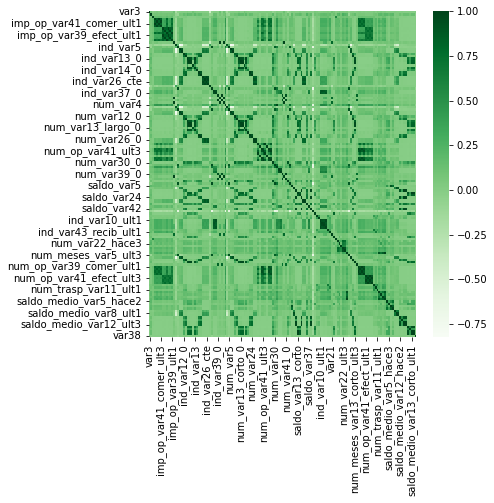

In [13]:
# Verificando a correlação das variáveis
corr = df_treino.drop(['ID','TARGET'],axis=1).corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap = 'Greens')

A figura acima é inviável para fazer uma análise mais aprofundada pois o dataset de treino possui 143 colunas numéricas (acima, 141 pois foram omitidas as colunas ID e TARGET). Teremos que utilizar outros métodos para trabalhar com a correlação.

In [14]:
# Variáveis preditoras e variável alvo
preditoras = df_treino.drop(['ID', 'TARGET'], axis = 1)
alvo = df_treino['TARGET']

**Correlação com a variável TARGET**
<br>
<br>
Para a correlação com a variável TARGET é indicado que a correlação não seja muito fraca. Correlações fracam são pouco relevantes para a criação de modelos. 
<br>
É possível encontrar uma classificação da força da correlação em https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson
<br>
Como não sabemos qual é a faixa de correlação, iremos primeiro encontrar seu mínimo e máximo e depois decidir qual vai ser o limite para filtragem.

In [15]:
# Checando os 10 menores e maiores valores absolutos de correlação
cor = df_treino.corr()

array_cor = np.array(abs(cor['TARGET']))

print('10 menores correlações:')
print('')

for i in range(0,10):
    print(f'A {i+1}a menor correlação absoluta é {np.sort(array_cor)[:10][i]}')

print('')
print(50*'-')
print('10 maiores correlações:')
print('')

for j in range(0,10):
    print(f'A {j+1}a maior correlação absoluta é {np.sort(array_cor)[-10:][-(j+1)]}')

10 menores correlações:

A 1a menor correlação absoluta é 0.00028870687299601604
A 2a menor correlação absoluta é 0.0004315774585237348
A 3a menor correlação absoluta é 0.000447883809368283
A 4a menor correlação absoluta é 0.00045451559048631925
A 5a menor correlação absoluta é 0.0006764205389823017
A 6a menor correlação absoluta é 0.000694106037222704
A 7a menor correlação absoluta é 0.0007607172433911442
A 8a menor correlação absoluta é 0.0011694298485357244
A 9a menor correlação absoluta é 0.001229955210006949
A 10a menor correlação absoluta é 0.0016236742351485624

--------------------------------------------------
10 maiores correlações:

A 1a maior correlação absoluta é 1.0
A 2a maior correlação absoluta é 0.15727942876706472
A 3a maior correlação absoluta é 0.1569647852846794
A 4a maior correlação absoluta é 0.14945735268387234
A 5a maior correlação absoluta é 0.14932218635941205
A 6a maior correlação absoluta é 0.1491775642692312
A 7a maior correlação absoluta é 0.1481558113303

Pela análise acima, vemos que as 10 maiores correlações absolutas estão acima da ordem de 10<sup>-2</sup>, e a 10ª menor correlação absoluta é da ordem de 10<sup>-3</sup>.
<br>
Vamos estabelecer correlações com a variável TARGET que tenham coeficiente absoluto de correlação maior que 1.00e<sup>-2</sup>

In [16]:
# Correlação com a variável TARGET
#limite estabelecido anteriormente
limite = 10**-2

# Valor absoluto da correlação com a variável TARGET
cor_alvo = abs(cor['TARGET'])

# Obtendo apenas os valores cuja correlação absoluta está acima do que definimos
relevantes = cor_alvo[cor_alvo > limite]

# Resetando os índices
relevantes = relevantes.reset_index()

# Montagem do dataframe com os resultados
relevantes.columns = ['Variaveis', 'Correlacao']
relevantes = relevantes.sort_values(by='Correlacao', ascending=False)

relevantes

,Variaveis,Correlacao
87,TARGET,1.000000
27,ind_var30,0.157279
68,num_meses_var5_ult3,0.156965
46,num_var30,0.149457
10,ind_var5,0.149322
...,...,...
44,num_var25_0,0.010653
6,imp_op_var41_efect_ult3,0.010570
64,num_var22_hace2,0.010533
8,imp_op_var39_efect_ult3,0.010500


In [17]:
# As outras variáveis são irrelevantes. Vamos removê-las de nossos datasets de treino e teste
manter = [i for i in relevantes['Variaveis']]

In [18]:
# TARGET está na primeira posição. Por conveniência, vamos deixá-la na última posição
manter[0:5]

['TARGET', 'ind_var30', 'num_meses_var5_ult3', 'num_var30', 'ind_var5']

In [19]:
# Deixando as variáveis ID na primeira posição e TARGET na última
manter.insert(0,'ID') # insere a variável ID na posição 0
manter.remove('TARGET') # remove a variável TARGET
manter.append('TARGET') # insere a variável TARGET novamente, dessa vez na última posição

In [20]:
# Selecionando as variáveis que foram mantiras
df_treino_manter = df_treino[manter]

In [21]:
# Checando como ficou o dataframe
df_treino_manter.head()

,ID,ind_var30,num_meses_var5_ult3,num_var30,ind_var5,num_var42,num_var5,var15,var36,num_var4,...,saldo_medio_var12_hace3,ind_var43_emit_ult1,num_var13_largo_0,num_var12_0,num_var25_0,imp_op_var41_efect_ult3,num_var22_hace2,imp_op_var39_efect_ult3,num_op_var39_comer_ult1,TARGET
0,1,0,0,0,0,0,0,23,99,0,...,0.0,0,0,0,0,0.0,0,0.0,0,0
1,3,1,1,3,0,0,0,34,3,1,...,0.0,0,0,0,0,0.0,0,0.0,0,0
2,4,1,3,3,1,3,3,23,99,1,...,0.0,0,0,0,0,0.0,0,0.0,0,0
3,8,1,2,3,1,3,3,37,2,3,...,0.0,0,0,0,0,0.0,3,0.0,9,0
4,13,0,0,0,0,0,0,23,99,0,...,0.0,0,0,0,0,0.0,0,0.0,0,0


<b>Correlação das variaveis entre si</b>
<br>
Vamos agora encontrar, dentre as variáveis que sobraram, aquelas que possuem alta correlação entre si. Variáveis altamente correlacionadas não agregam informação relevante para modelos de machine learning.

In [22]:
# Obtendo a lista de novas variáveis preditoras
novas_preditoras = df_treino_manter.drop(['ID', 'TARGET'], axis = 1)

# Identificando as variáveis altamente correlacionadas
encontrar_alta_corr(novas_preditoras, 0.7)

Máxima correlação: 1.0 , Mínima correlação:  -0.8247642746505996


ind_var8                       num_var8                   1.000000
ind_var13_corto                num_var13_corto            1.000000
ind_var8_0                     num_var8_0                 0.999594
ind_var24                      num_var24                  0.999550
imp_op_var39_efect_ult3        imp_op_var41_efect_ult3    0.999438
                                                            ...   
saldo_medio_var13_corto_hace2  ind_var13_0                0.701862
num_var24_0                    saldo_medio_var12_ult3     0.701785
                               saldo_var42                0.701296
ind_var24_0                    saldo_medio_var12_ult3     0.700881
saldo_var13                    ind_var13_corto_0          0.700155
Length: 234, dtype: float64

In [23]:
# Obtendo um set com as variáveis altamente correlacionadas
alta_correlacao = listar_alta_corr(novas_preditoras, 0.7)

# Vendo quantas variáveis foram selecionadas
print(f'{len(alta_correlacao)} variáveis foram selecionadas por serem altamente correlacionada com outras.')

62 variáveis foram selecionadas por serem altamente correlacionada com outras.


In [24]:
# Excluindo essas variáveis do dataset de treino
df_treino_manter = df_treino_manter.drop(alta_correlacao, axis = 1)

# Visualizando o dataset
df_treino_manter.head()

,ID,ind_var30,var15,var36,var38,ind_var8_0,ind_var39_0,saldo_medio_var5_ult3,saldo_var30,ind_var43_recib_ult1,...,imp_trans_var37_ult1,ind_var14_0,imp_op_var39_comer_ult3,num_var22_ult1,saldo_medio_var13_corto_hace3,ind_var13_largo_0,imp_op_var41_efect_ult1,saldo_medio_var12_hace3,ind_var43_emit_ult1,TARGET
0,1,0,23,99,10.576564,0,1,0.00,0.00,0,...,0.0,0,0.0,0,0.00,0,0.0,0.0,0,0
1,3,1,34,3,10.805234,0,1,0.00,300.00,0,...,0.0,0,0.0,0,122.22,0,0.0,0.0,0,0
2,4,1,23,99,11.117417,0,1,2.07,3.00,0,...,0.0,0,0.0,0,0.00,0,0.0,0.0,0,0
3,8,1,37,2,11.066763,0,1,138.84,70.62,0,...,0.0,0,195.0,0,0.00,0,0.0,0.0,0,0
4,13,0,23,99,11.384816,0,1,0.00,0.00,0,...,0.0,0,0.0,0,0.00,0,0.0,0.0,0,0


## Proporção das variáveis categóricas

Caso alguma variável categórica tenha tenha a mesma proporção de distribuição em seus valores, essa variável pode ser considerada irrelevante. Por exemplo: uma proporção 50/50 em uma variável de duas categorias.
Neste caso, a variável em questão pode ser eliminada.

In [25]:
# Carregando variáveis categoricas
with open('pickle_files/var_cats.pkl', 'rb') as file1:
      
    # Chamando o método load para fazer a desserialização
    var_cats = pickle.load(file1)
    
# Carregando variáveis numéricas
with open('pickle_files/var_numericas.pkl', 'rb') as file2:
      
    # Chamando o método load para fazer a desserialização
    var_numericas = pickle.load(file2)

In [26]:
# Conferindo se foram importadas corretamente
print('Categóricas:',(var_cats[:5]))
print('\nNuméricas:',(var_numericas[:5]))

Categóricas: ['ind_var1_0', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8']

Numéricas: ['imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3']


In [27]:
# Atualizando as variáveis
var_cats_atualizadas = [i for i in var_cats if i in df_treino_manter.columns]
var_numericas_atualizadas = [j for j in var_numericas if j in df_treino_manter.columns]

In [28]:
# Conferindo a dimensionalidade
print('A quantidade de variáveis resultantes é igual à quantidade de colunas do dataset desconsiderando as variáveis ID e TARGET?\nResposta:')
len(var_cats_atualizadas) + len(var_numericas_atualizadas) == len(df_treino_manter.drop(['ID', 'TARGET'], axis = 1).columns)

A quantidade de variáveis resultantes é igual à quantidade de colunas do dataset desconsiderando as variáveis ID e TARGET?
Resposta:


True

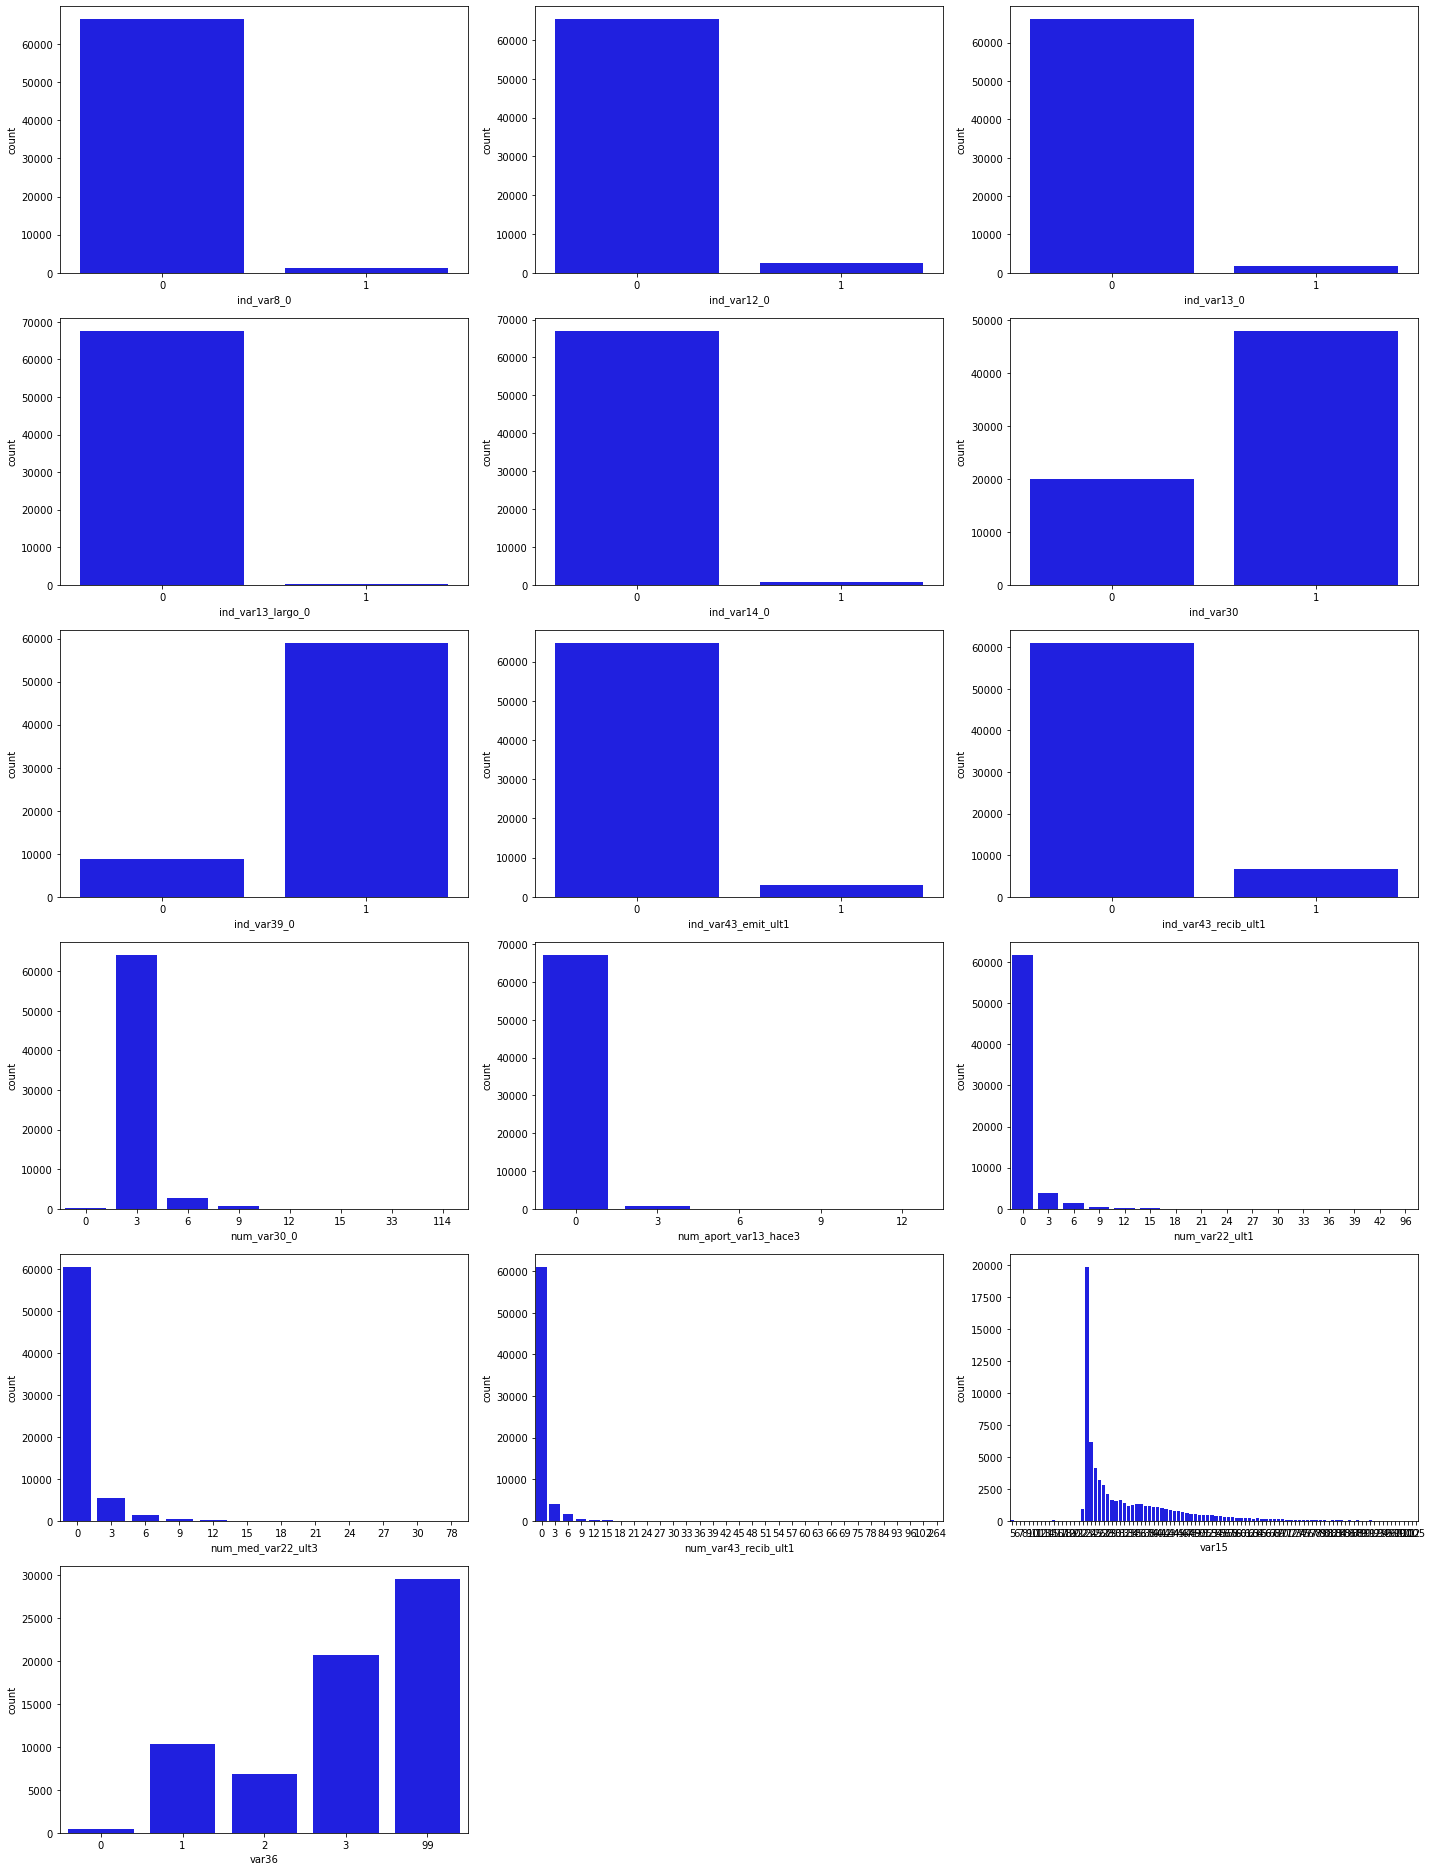

In [29]:
# Plot das contagens de valores das variáveis categóricas
plt.figure(figsize = (20,30))
for i in range(0, len(var_cats_atualizadas)):
    plt.subplot(7, 3, i+1)
    sns.countplot(x = df_treino_manter[var_cats_atualizadas[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

Nenhuma das variáveis apresentou uma proporção semelhante entre seus conteúdos, dessa forma, não será necessário fazer nenhuma remoção.

In [30]:
# Selecionando as colunas para o dataset de teste
colunas = df_treino_manter.drop('TARGET' , axis = 1).columns
df_teste_colunas = df_teste[colunas]

# Visualizando o dataset de teste
df_teste_colunas.head()

,ID,ind_var30,var15,var36,var38,ind_var8_0,ind_var39_0,saldo_medio_var5_ult3,saldo_var30,ind_var43_recib_ult1,...,num_var30_0,imp_trans_var37_ult1,ind_var14_0,imp_op_var39_comer_ult3,num_var22_ult1,saldo_medio_var13_corto_hace3,ind_var13_largo_0,imp_op_var41_efect_ult1,saldo_medio_var12_hace3,ind_var43_emit_ult1
0,2,1,32,3,40532.10,0,1,4.80,6.0,0,...,3,0.0,0,0.0,0,0.0,0,0.0,0.0,0
1,5,1,35,3,45486.72,0,0,2.85,3.0,0,...,3,0.0,0,0.0,0,0.0,0,0.0,0.0,0
2,6,1,23,3,46993.95,0,1,66.15,30.0,0,...,3,0.0,0,0.0,0,0.0,0,60.0,0.0,0
3,7,0,24,99,187898.61,0,1,0.00,0.0,0,...,3,0.0,0,0.0,0,0.0,0,0.0,0.0,0
4,9,1,23,3,73649.73,0,1,21.30,30.0,0,...,3,0.0,0,0.0,0,0.0,0,0.0,0.0,0


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

## Transformação logarítmica
<br>
Primeiro, vamos aplicar a transformação logarítmica e criar os datasets contendo essas transformações. As variáveis que definimos para fazer a aplicação logarítmica são: var38, código saldo, código imp. Em todas essas transformações manteremos o valor 0.

In [31]:
variaveis_para_log = [i for i in df_treino_manter.columns if ((i=='var38')|('saldo' in i)|('imp' in i))]
variaveis_para_log

['var38',
 'saldo_medio_var5_ult3',
 'saldo_var30',
 'saldo_medio_var5_hace3',
 'imp_trans_var37_ult1',
 'imp_op_var39_comer_ult3',
 'saldo_medio_var13_corto_hace3',
 'imp_op_var41_efect_ult1',
 'saldo_medio_var12_hace3']

In [32]:
df_treino_log, df_teste_log = aplicar_log_com_zero(variaveis_para_log, df_treino_manter, df_teste_colunas)

In [33]:
# Checando se foram gerados valores nulos
print('Checagem de valores nulos para df_treino_log:\n',df_treino_log.isna().sum())
print('')
print('Checagem de valores nulos para df_teste_log:\n',df_teste_log.isna().sum())

Checagem de valores nulos para df_treino_log:
 ID                               0
ind_var30                        0
var15                            0
var36                            0
var38                            0
ind_var8_0                       0
ind_var39_0                      0
saldo_medio_var5_ult3            0
saldo_var30                      0
ind_var43_recib_ult1             0
ind_var13_0                      0
ind_var12_0                      0
saldo_medio_var5_hace3           0
num_var43_recib_ult1             0
num_aport_var13_hace3            0
num_med_var22_ult3               0
num_var30_0                      0
imp_trans_var37_ult1             0
ind_var14_0                      0
imp_op_var39_comer_ult3          0
num_var22_ult1                   0
saldo_medio_var13_corto_hace3    0
ind_var13_largo_0                0
imp_op_var41_efect_ult1          0
saldo_medio_var12_hace3          0
ind_var43_emit_ult1              0
TARGET                           0
dtype: i

### Divisão em Treino e Teste

In [34]:
# Cria um objeto separadado para as variáveis de entrada
X = df_treino_manter.drop(['ID','TARGET'], axis = 1)
X_log = df_treino_log.drop(['ID','TARGET'], axis = 1)

# Cria um objeto separado para a variável target
y = df_treino_manter['TARGET']
y_log = df_treino_log['TARGET']

In [35]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.3, 
                                                        random_state = 1234,
                                                        stratify = df_treino_manter['TARGET'])

# Split em dados de treino e teste com amostragem estratificada para os dados transformados
X_treino_log, X_teste_log, y_treino_log, y_teste_log = train_test_split(X_log, 
                                                                        y_log, 
                                                                        test_size = 0.3, 
                                                                        random_state = 1234,
                                                                        stratify = df_treino_log['TARGET'])

## Feature Scaling

Vamos agora realizar a padronização de nossas variáveis no dataset de treino. Algumas variáveis apresentam um valor valor muito discrepante das outras, o que pode atrapalhar na aplicação dos modelos de machine learning, uma vez que essas variáveis com valores altos podem ser interpretadas como mais importantes. Para isso, utilizaremos o MinMaxScaler do pacote scikit learn.
<br>
Primeiro, faremos o balanceamento de classe e, depois, a padronização dos dados.

**Fazendo o balanceamento de classe**

In [36]:
# Checando a discrepância das classes
y_treino.value_counts()

0    45530
1     1923
Name: TARGET, dtype: int64

In [37]:
# Instanciando o oversample
over_sampler = SMOTE(k_neighbors = 2)

In [38]:
# Aplicando o oversample
X_over , y_over = over_sampler.fit_resample(X_treino, y_treino)
X_over_log , y_over_log = over_sampler.fit_resample(X_treino_log, y_treino_log)

In [39]:
# Checando a proporção
print(f'Temos {len(X_over)} valores de X_over e {len(y_over)} valores de y_over')
print('')
print(f'Temos {len(X_over_log)} valores de X_over_log e {len(y_over_log)} valores de y_over_log')

Temos 91060 valores de X_over e 91060 valores de y_over

Temos 91060 valores de X_over_log e 91060 valores de y_over_log


In [40]:
# Aplicando a padronização

# Definindo os parâmetros
treino_media = X_over.mean()
treino_std = X_over.std()
treino_media_log = X_over_log.mean()
treino_std_log = X_over_log.std()

# Padronizando
X_over = (X_over - treino_media)/treino_std
X_teste = (X_teste - treino_media)/treino_std

X_over_log = (X_over_log - treino_media_log)/treino_std_log
X_teste_log = (X_teste_log - treino_media_log)/treino_std_log

In [41]:
# # Salvando em disco
# X_teste.to_pickle('pickle_files/X_teste.pkl')
# X_teste_log.to_pickle('pickle_files/X_teste_log.pkl')
# X_over.to_pickle('pickle_files/X_over.pkl')
# X_over_log.to_pickle('pickle_files/X_over_log.pkl')
# y_teste.to_pickle('pickle_files/y_teste.pkl')
# y_teste_log.to_pickle('pickle_files/y_teste_log.pkl')
# y_over.to_pickle('pickle_files/y_over.pkl')
# y_over_log.to_pickle('pickle_files/y_over_log.pkl')